# <font color='white'>Introduction aux systèmes radar</font>

---

<img src="images/logo.png" width="100" align="right">


> Year: **2022**
>
> Version: **1.0**


## <font color='white'>Introduction</font>

---

Un RADAR (RAdio Detection And Ranging) est un système de détection électromagnétique (EM) et de mesure de distance. Son principe est analogue aux systèmes d'écholocation qu'utilisent certains animaux évoluant en milieu obscurs (chauve-souris, cétacés). La différence principale est que l'on utilise une onde EM et non sonore.

Le radar émet donc une impulsion EM de forte puissance. Celle-ci se propage jusqu'à rencontrer un éventuel obstacle. Il réfléchit l'onde dont une partie est recueillie sur l'antenne du radar. La mesure du temps de vol entre l'onde émise et l'onde reçue permet d'estimer la distance de la cible.

<img src="images/rad_fig1.png" width="500">


Ce système est donc actif, ce qui lui procure des avantages par rapport aux systèmes de détection et de mesures passifs (optiques, par exemple) nécessitant une source extérieure au système (soleil, par exemple). De plus, en fonction de la bande du spectre EM choisie pour émettre, le système sera capable de «voir» à travers certains milieux opaques à la lumière visible (nuages, brouillard) et même pénétrer la matière sur une certaine profondeur (détection de mines enfouies, ...). Enfin, comme on maitrise l’onde émise, on a directement accès à des mesures précises de distances, contrairement aux systèmes passifs.


Le champ d’application de tels systèmes est donc très vaste. Historiquement, les applications sont militaires (veille contre les attaques aériennes, détections de navires, autodirecteurs de missiles, cartographie de terrains, ...). Dans le monde civil, on peut citer la navigation aérienne et maritime, la météorologie, l’altimétrie, les systèmes de freinage d’urgence pour véhicules automobiles, ...).

## Emission d’une impulsion unique, cible fixe

Nous allons tout d’abord nous placer dans le cas le plus simple d’objets à détecter immobiles.

### Modélisation des signaux émis et reçus


Dans un premier temps, le signal émis, $e(t)$, sera une simple impulsion de durée $T = 1$ ms, modulée par une fréquence porteuse constante $f_0 = 40$ KHz, comme représenté sur la figure ci-dessous:

<img src="images/rad_fig2.png" width="500">


Le signal reçu sur l’un des récepteurs, $r(t)$, sera une réplique de $e(t)$ atténuée et décalée dans le temps d’une valeur $\tau_0$.

#### Question 1

Donner l’expression de $\tau_0$ en fonction de la distance $d$ entre la cible et le radar et $c$ la célérité des ondes.

---


**Réponse Question 1 :**

Etant donné que le signal parcours le chemin aller-retour de l'émetteur jusqu'à l'obstacle, il doit parcourir $2$ fois la distance $d$ à la célérité $c$.
On a donc :
\begin{align}
\boxed{\tau_0 = \frac{2d}{c}} 
\end{align}

Les signaux réels, émis et reçus sont tout d’abord convertis en leurs signaux analytiques correspondants.

>##### Signal analytique, transformée de Hilbert 
>La transformée de Fourier $X(f)$ d’un signal réel $x(t)$ est à symétrie hermitienne (module pair et phase impaire). L'observation de la transformée de Fourier seulement sur les fréquences positives suffit donc à reconstruire le signal sans perte d'information. 
>
>On peut ainsi définir le signal analytique associé par 
>
> $$X_a(f) = 2 U(f) X(f)$$
>
>où $U(f)$ est l’échelon unité. Celui-ci est un signal complexe $x_a(t) = x(t) + i \hat x(t)$ dont la partie réelle est le signal d’origine $x(t)$. Dans le cas des signaux à bande étroite (dont l’excursion fréquentielle est faible autour d’une fréquence centrale), la partie imaginaire, appelée Transformée de Hilbert correspond à la composante en quadrature par rapport à $x(t)$ (déphasée de $\pi/2$)



#### Question 2

Vérifier que $\Re[x_a(t)] = x(t)$ en calculant $\mathcal F [\Re[x_a(t)]]$.
De même, donner la fonction de transfert fréquentielle correspondant à la transformée de Hilbert en calculant $\mathcal F [\Im[x_a(t)]]$ . En déduire que la transformée de Hilbert correspond à un filtre déphaseur pur de $\cfrac{\pi}{2}$.
Calculer la transformée de Fourier du signal émis, $e(t)$. En déduire l’expression du signal analytique associé, $e_a(t)$.

---

Pour calculer $\mathcal F [\Re[x_a(t)]]$, on commence par écrire : 

$$x_a(t) = \int_{-\infty}^{+\infty} X_a(f)e^{2i \pi ft} df = 2\int_{0}^{+\infty} X(f)e^{2i \pi ft} df$$

Or par un changement de variable affine, et par la symétrie hermitienne de $X(f)$ (qui donne $\overline{X(f)} = X(-f)$, $x(t)$ étant un signal réel) on a :

$$\int_{0}^{+\infty} X(f)e^{2i \pi ft} df = - \int_{0}^{-\infty} \overline{X(f)}e^{- 2i \pi ft} df = \overline{\int_{-\infty}^{0} X(f)e^{2i \pi ft}}$$

Or la partie réelle de cette dernière quantité est égale à la partie réelle de son conjugué, donc $\Re[x_a(t)]$ n'est autre que la tranformée de Fourrier inverse de $X(f)$, et donc sa transformée de Fourier vaut $x(t)$

Et ainsi on obtient : 

\begin{equation}
\boxed{\Re[x_a(t)] = x(t)}
\end{equation}


On en déduit alors directement que la fonction de transfert fréquentielle correspondant à la transformée de Hilbert laisse les fréquences positives inchangées et revoie l'opposé de la fonction pour les fréquences négatives : 


\begin{equation}
\boxed{\mathcal F [\Im[x_a(t)]] = -i\mathcal F [x_a(t) - \Re[x_a(t)]] = -iX(f)(2U(f) - 1)}
\end{equation}

Comme le module de la fonction de transfert étudiée est pair, on en déduit que la transformée de Hilbert joue le role d'un déphaseur pur de $\frac{\pi}{2}$ (par exemple, dans le cas d'un signal en cosinus, le renversement du coefficient associé à la fréquence positive change le cosinus en sinus: on a bien un déphasage de $\frac{\pi}{2}$).

Dans notre cas d'étude, on a une impultion de durée $T$, modulée par une fréquence porteuse $f_0$ ($e(t) = 1_{[0,T]}(t)cos(2\pi ft)$). On a donc classiquement : 

$$\mathcal F [e(t)] = \mathcal F [1_{[0,T]}(t)] * \mathcal F [cos(2\pi ft)] =  $$

On remarque que la transformée de Fourier de ce signal réel est bien à symétrie hermitienne, et on peut calculer $e_a(t)$ avec les résultats précédents :

\begin{equation}
\boxed{e_a(t) = e(t) + ie(t + \frac{\pi}{2}) = 1_{[0,T]}(t)e^{2i\pi f_0 t}}
\end{equation}






L’intérêt de convertir les signaux réels en leurs équivalents complexes réside dans le fait que tout déphasage sera vu comme une simple multiplication par un nombre complexe. Il est ainsi plus facile d’extraire et de traiter la phase de 
$x_a(t) = \alpha e^{i \varphi} e^{2 i \pi f_0 t}$ que de $x(t) = \alpha \cos (2 i \pi f_0 t + \varphi)$

### Numérisation des signaux

Ces signaux complexes sont ensuite échantillonnés à une fréquence $f_s = 9.5$ KHz (environ), ne respectant pas le théorème de Shannon. Cela permet de démoduler (diminution de la fréquence porteuse) les signaux et de réduire la taille des vecteurs à traiter. 

> #####  Théorème de Shannon – Repliement de spectre (aliasing)
>
>Le fait d’échantillonner un signal continu à une cadence $f_s$ entraine une périodisation de sa transformée de Fourier à la période $f_s$ Ainsi, si l’on veut retrouver, sans ambiguïté le signal continu d’origine, il faut échantillonner à une cadence strictement supérieure à 2 fois la fréquence maximale contenue dans le signal d’origine.
>
>Si cette condition de Shannon n’est pas respectée, une partie de l’information sera perdue et le signal sera modifié. Dans le cas d’un signal à bande étroite, si l’on choisit une fréquence d’échantillonnage supérieure à la bande mais inférieure à la fréquence porteuse, le repliement de spectre engendré modifie seulement la fréquence porteuse apparente et est assimilable à une démodulation.

#### Question 3
Quelle sera la fréquence apparente des signaux échantillonnés ?

---

In [179]:
#IMPORTATION DES MODULES NECESSAIRES
import math as ma
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Transformée de Fourier')

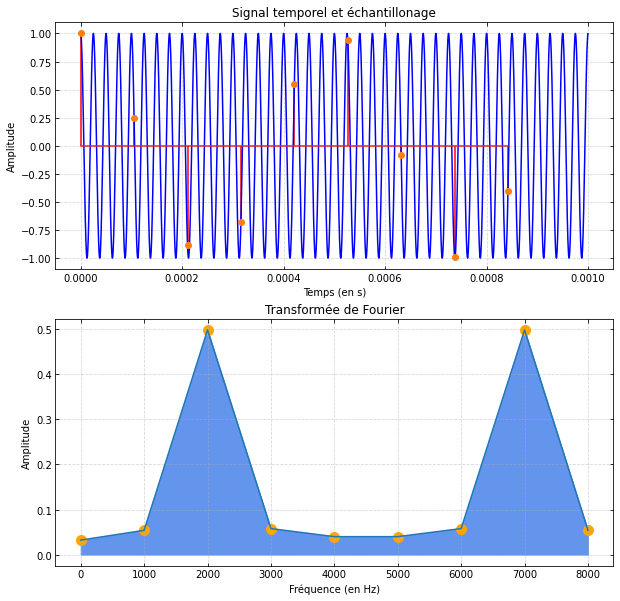

In [180]:
def u(t,w): #Signal en entrée
    if t<T:
        return np.cos(w*t)
    return 0

T=10**(-3) #Temps d'impulsion


#Signal à échantilloner à f0 = 80 kHz (Shannon)
f0 = 40 * (10**3) #Hz
t0 = 1.0/(f0*100) #s

N0 = int(T*(f0*100))
t0 = np.arange(0,N0)*t0

x0 = np.zeros(N0)
w0 = 2*np.pi*f0
for k in range(N0):
    x0[k] = u(t0[k], w0) 


# Mais points échantillonés à fs = 9,5kHz
fs = 9.5 * (10**3)
ts = 1.0/(fs)

Ns = int(T*fs)
ts = np.arange(0,Ns)*ts

xs = np.zeros(Ns)
for k in range(Ns):
    xs[k] = u(ts[k], w0) 



plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(t0,x0,"b")
plt.stem(ts,xs,"r", markerfmt = 'C1o')
plt.xlabel("Temps (en s)")
plt.ylabel("Amplitude")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Signal temporel et échantillonage')


plt.subplot(212)
tfd = np.fft.fft(xs)
f = np.arange(0,Ns)*1.0/T
plt.plot(f,np.absolute(tfd)/Ns)
plt.fill_between(f, np.absolute(tfd)/Ns, color = 'cornflowerblue')
plt.scatter(f,np.absolute(tfd)/Ns, color = 'orange', s = 100)
plt.xlabel('Fréquence (en Hz)')
plt.ylabel('Amplitude')
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Transformée de Fourier')

**Réponse Question 3 :** 

Dans notre cas présent, on échantillonne le signal sans respect du critère de Shannon ( $f_s = 9,5 kHz < 2*f_0 = 2*40 kHz$ ) \
Avec respect du critère, on aurait une transformée de Fourier d'une sinusoïde pure correspondant à un unique pic à la fréquence de la sinusoïde donc $f_0 = 40 kHz$. Cependant, $f_0$ se situe en dehors de l'intervalle $\left]-f_e/2;f_e/2\right[$. \
On remarque par la transformée numérique ci-dessus qu'on retrouve deux pics dont un seul dans l'intervalle $\left]-f_e/2;f_e/2\right[$ à $f = 2,0$ $kHz$ avec $f \equiv f_0 \pmod {f_s}$. \
On assiste donc à un phénomène de repliement spectrale.

Si on cherche à reconstituer le signal continu à partir de ces échantillons, on obtient une sinusoïde de fréquence plus basse que la sinusoïde initiale : $$\boxed{f = 2,0 kHz}$$

### Estimation de la distance


Nous avons vu dans la partie précédente, que le but premier d’un radar était de détecter et d’estimer la distance des objets environnants. Pour cela, la méthode optimale est d’effectuer l’intercorrélation entre le signal reçu et le signal émis.

> ##### Autocorrélation - Intercorrélation
>
> On sait que l’énergie se conserve par transformée de Fourier (théorème de Parseval) :
>
> $$ \int_{-\infty}^{+\infty} |x(t)|^2 dt = \int_{-\infty}^{+\infty} |X(f)|^2 df $$
>
> On peut ainsi définir une densité spectrale d’énergie :  $\Phi_x (f) = |X(f)|^2$.
>
>
> Par transformée de Fourier inverse, on a :
> $$ \mathcal F^{-1} [|X(f)|^2] = x(t) * x^*(-t) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
>C’est la fonction d’autocorrélation, notée :
> $$ R_x(\tau) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
> Elle mesure la ressemblance d’un signal $x(t)$ avec sa réplique décalée en temps. Cette fonction est à symétrie hermitienne et maximale en 0. 
>
> On peut généraliser cette fonction à l’intercorrélation entre 2 signaux :
> $$ R_{xy}(\tau) = \int_{-\infty}^{+\infty}  x(t)\, y^*(t-\tau) dt = x(t) * y^*(-t) = \mathcal F^{-1} [X(f)Y^*(f)] $$
>
>Pour les signaux discrétisés en temps, on utilise la formulation suivante :
> $$ R_{xy}[k] = \sum_{n = -\infty}^{+\infty} x[n] y^*[n-k] $$

> ##### Algorithme de FFT
> L’algorithme dit de Fast Fourier Transform (FFT) dû à Cooley et Tukey (1965) consiste à scinder la transformée de Fourier du vecteur initial de taille N en transformées de Fourier de taille N/2. On peut ainsi se ramener successivement à des transformées de Fourier élémentaires de taille 2 permettant de passer d’une charge calculatoire en $O(N^2)$ avec l’algorithme « naïf » (produit matriciel) à une charge calculatoire en $O(Nlog_2(N))$.

#### Question 4
En supposant que $r_a(t) = \alpha e_a(t - \tau_0)$ où $\alpha$ est un nombre complexe inconnu, exprimer l’intercorrélation $R_{r_a e_a}(\tau)$ en fonction de l’autocorrélation de $e_a(t)$. Calculer et tracer la fonction d’autocorrélation de $e_a(t)$ .

---

**Réponse Question 4**

Avec les hypothèses de l'énoncé : \
Par définition, on a l’intercorrélation 
$$ R_{r_a e_a}(\tau) = \int_{-\infty}^{+\infty}  r_a(t)\, e_a^*(t-\tau) dt = \int_{-\infty}^{+\infty}  \alpha e_a(t-\tau_0)\, e_a^*(t-\tau) dt $$
et en posant $t^{\prime} = t - \tau_0$, on a : 
$$ R_{r_a e_a}(\tau) = \alpha \int_{-\infty}^{+\infty} e_a(t)\, e_a^*(t-(\tau - \tau_0) dt$$

D'où finalement, 
\begin{equation}
\boxed{R_{r_a e_a}(\tau) = \alpha R_{e_a}(\tau - \tau_0)}
\end{equation}

Concernant la valeur de $R_{e_a}(\tau)$ :
\begin{align}
R_{e_a}(\tau) &= \int_{-\infty}^{+\infty} e_a(t)\, e_a^*(t-\tau) dt \\
&= \int_{-\infty}^{+\infty} \mathbb{1}_{[0,T]}(t) \exp{(i \omega_0 t)} \mathbb{1}_{[0,T]}(t-\tau)\exp{(-i \omega_0 (t-\tau))} dt\\
&=\int_{-\infty}^{+\infty} \mathbb{1}_{[0,T]}(t) \mathbb{1}_{[0,T]}(t-\tau) \exp{(i\omega_0 \tau)} dt
\end{align}

**Cas 1:** $\tau<-T$  
Alors,
$$
\forall t, \mathbb{1}_{[0,T]}(t) \mathbb{1}_{[0,T]}(t-\tau) = 0
$$
Donc: $R_{e_a}(\tau)=0$

**Cas 2:** $-T<\tau<0$
 
Alors,
$$R_{e_a}(\tau) = \int_{0}^{T+\tau} \exp{(i\omega_0 \tau)} dt = (\tau + T) \exp{(i\omega_0 \tau)}$$

**Cas 3:** $0<\tau<T$
 
Alors,
$$R_{e_a}(\tau) = \int_{\tau}^{T} \exp{(i\omega_0 \tau)} dt = (T-\tau) \exp{(i\omega_0 \tau)}$$

**Cas 4:** $\tau>T$
 
Alors, $R_{e_a}(\tau) = 0$

 
 
**Bilan:**
$$\boxed{R_{e_a}(\tau) = \left[\mathbb{1}_{[-T,0]}(\tau) (T+\tau) + \mathbb{1}_{[0,T]}(\tau) (T-\tau)\right]  \exp{(i\omega_0 \tau)}}$$


Text(0.5, 1.0, "Fonction d'autocorrélation : $R_{e_a}$")

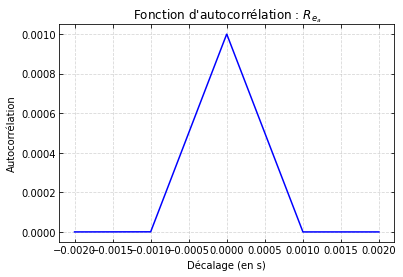

In [181]:
#Fonction d'autocorréalation :
#La fonction étant à valeurs complexe, je vais tracer son module :
list_tau = np.linspace(-2*T, 2*T, 2000)

def mod_r_ea(tau):
    if -T<tau<0:
        return T + tau
    if 0<=tau<T:
        return T - tau
    else:
        return 0

auto_corel = [mod_r_ea(t) for t in list_tau]

plt.figure(figsize=(6,4))
plt.plot(list_tau, auto_corel, "b-")
plt.xlabel("Décalage (en s)")
plt.ylabel("Autocorrélation")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title("Fonction d'autocorrélation : $R_{e_a}$")

On obtient bien une fonction paire centrée en 0. Elle est affine de part et d'autre de l'axe des ordonnées.

#### Code 1 - Une impulsion non modulèe en fréquence 

Le fichier « signal1.mat » correspond à un enregistrement des signaux analytiques émis et reçus sur une scène réelle.
* Observer l’allure temporelle de ces signaux et vérifier la valeur de la fréquence observée.
* Calculer et tracer la fonction d’intercorrélation.
* Essayer d’identifier le nombre de cibles présentes ainsi que leur distance. Essayer de définir une résolution du système (distance minimale à partir de laquelle on peut voir 2 cibles). Relier cette résolution à la durée de l’impulsion émise T.

In [182]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

c = 340    # célérité des ondes sonores 
f0 = 40E3  # fréquence porteuse
T = 1E-3   # durée de l'impulsion

In [183]:
#IMPORTATION DES BIBLIOTHEQUES UTILES
import scipy.io
import scipy.signal

In [184]:
data = scipy.io.loadmat('data/signal1.mat') # chargement du fichier de données

e = data['e']
r = data['r']
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2             # axe distance (metres)

cor_fft = scipy.signal.correlate(r, e, mode = 'same', method = 'fft')    # calcul de la corrélation par FFT
resol_theorique = int(c*T/2  * 2*Fs/c )    # résolution théorique qui correspond à la distance minimale rendant la détection de deux signaux différents possible.
peaks = scipy.signal.find_peaks(np.absolute(cor_fft)[:,0], height = 50, distance = resol_theorique, width=0) 

peaks_d = peaks[0]*c/Fs/2

c:\Users\cyril\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.
c:\Users\cyril\miniconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
No handles with labels found to put in legend.
c:\Users\cyril\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No handles with labels found to put in legend.


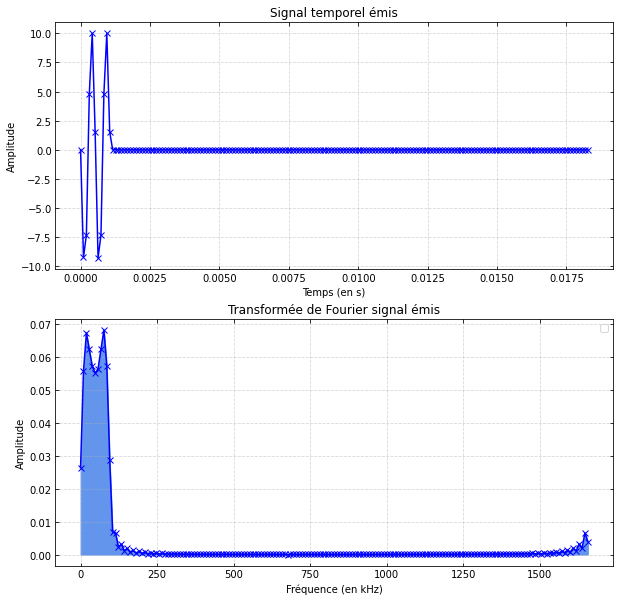

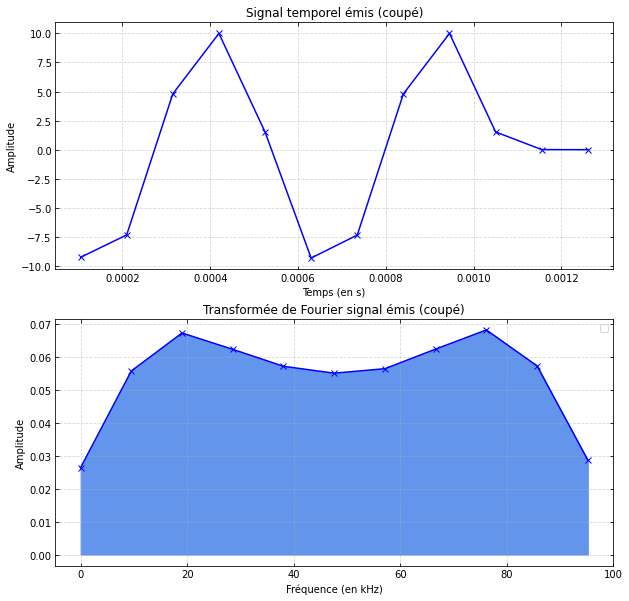

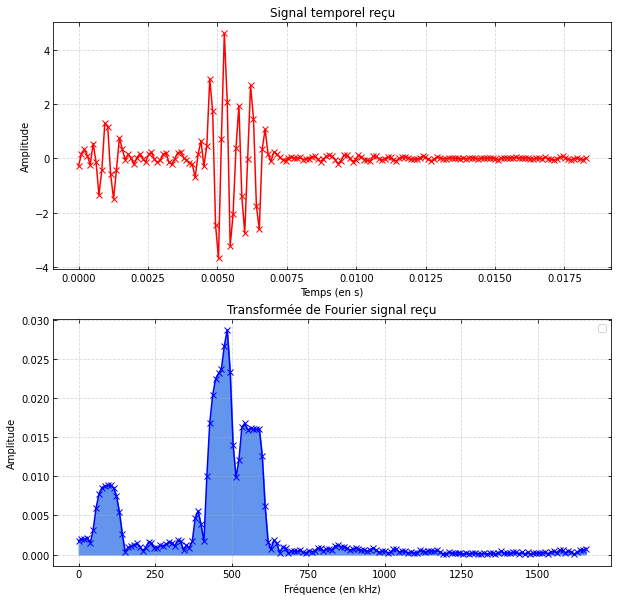

In [185]:
#TRACES
#ALLURE TEMPORELLE 

#Signal émis
plt.figure(figsize=(10,10))
plt.subplot(211)
te = np.transpose(np.arange(0,N)*(1/Fs))
plt.plot(te, e, 'bx-')
plt.xlabel("Temps (en s)")
plt.ylabel("Amplitude")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Signal temporel émis')

plt.subplot(212)
tfd = np.fft.fft(e)
f = np.transpose(np.arange(0,N)*(Fs))
plt.plot(f*10**(-3),np.absolute(tfd)/N, 'bx-')
plt.fill_between(f.reshape(1,N)[0]*10**(-3),(np.absolute(tfd)/N).reshape(1,N)[0], color = 'cornflowerblue')
plt.xlabel('Fréquence (en kHz)')
plt.ylabel('Amplitude')
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Transformée de Fourier signal émis')
plt.legend()

#Signal émis coupé
plt.figure(figsize=(10,10))
eps = 0.01
e_mask = np.ma.masked_inside(e, -eps, eps)
plt.subplot(211)
te = np.transpose(np.arange(0,N)*(1/Fs))
plt.plot(te, e_mask, 'bx-')
plt.xlabel("Temps (en s)")
plt.ylabel("Amplitude")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Signal temporel émis (coupé)')

plt.subplot(212)
tfd = np.fft.fft(e_mask)
eps_tfd = 0.01
tfd_mask = np.ma.masked_less_equal(np.absolute(tfd)/N, eps_tfd)
f = np.transpose(np.arange(0,N)*(Fs))
#plt.stem(f*10**(-3), tfd_mask)
plt.plot(f.reshape(1,N)[0]*10**(-3), tfd_mask.reshape(1,N)[0], 'bx-')
plt.fill_between(f.reshape(1,N)[0]*10**(-3),tfd_mask.reshape(1,N)[0], color = 'cornflowerblue')
plt.xlabel('Fréquence (en kHz)')
plt.ylabel('Amplitude')
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Transformée de Fourier signal émis (coupé)')
plt.legend()


#Signal reçu
plt.figure(figsize=(10,10))
plt.subplot(211)
tr = np.transpose(np.arange(0,N)*(1/Fs))
plt.plot(tr, r, 'rx-')
plt.xlabel("Temps (en s)")
plt.ylabel("Amplitude")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Signal temporel reçu')

plt.subplot(212)
tfd = np.fft.fft(r)
f = np.transpose(np.arange(0,N)*(Fs))
plt.plot(f*10**(-3),np.absolute(tfd)/N, 'bx-')
plt.fill_between(f.reshape(1,175)[0]*10**(-3),(np.absolute(tfd)/N).reshape(1,175)[0], color = 'cornflowerblue')
plt.xlabel('Fréquence (en kHz)')
plt.ylabel('Amplitude')
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Transformée de Fourier signal reçu')
plt.legend()

**Réponse Question 4 | Code 1 :** 

On retrouve une fréquence du signal émis de l'ordre de $f=20kHz$ (cela se mesure sur le profil temporel ou spectral, où le pic correcpondant dans le spectre n'est pas de largeur nulle, ceci à cause de l'expansion temporelle finie du signal émis) et une fréquence du signal reçu du même ordre de grandeur (mesure sur le profil temporel, $4T = 2ms$).

In [186]:
(peaks[0]*c/Fs/2)[0]

array([1.6422 , 2.33835, 2.51685])

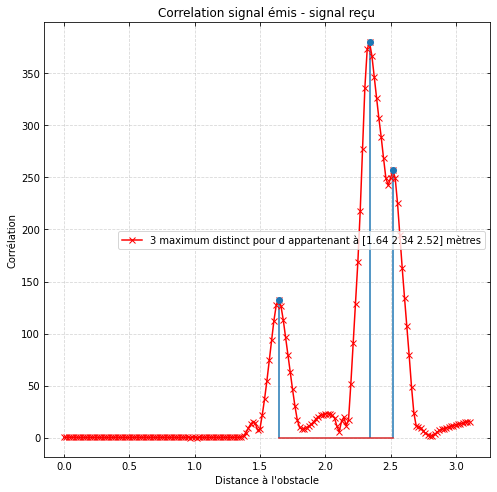

In [187]:
#Intercorrélation

plt.figure(figsize=(8,8))
plt.plot(np.transpose(d), np.absolute(cor_fft), 'rx-', label = f"{len(peaks_d[0])} maximum distinct pour d appartenant à {np.round(peaks_d, 2)[0]} mètres")
plt.stem((peaks[0]*c/Fs/2)[0], peaks[1]['peak_heights']) 
plt.xlabel("Distance à l'obstacle")
plt.ylabel("Corrélation")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Correlation signal émis - signal reçu')
plt.legend()
plt.show()

On retrouve donc la présence de $3$ obstacles distincts. Le premier se situe à $d = 1.64 m$ de la cible et le deuxième à $d = 2.34 m$ de la cible et le dernier à $d = 2.52m$. 
En effet, la présence d'une cible se traduit par la présence d'un maxima sur la coube d'intercorrélation. Il est nécessaire que la distance entre deux maxima soit supérieur à la résolution du système avec : $$R_{ésolution} = \frac{cT}{2} \approx 17cm $$

On remarque que la distance séparant les deux derniers pics est très légerement supérieure à cette résolution. Cela se traduit par deux pics très proches sur la courbe de corrélation, ils sont à la limite de l'indiscernabilité.

Le pouvoir de résolution du système en utilisant cette forme d’onde basique (impulsion modulée par une fréquence constante) ne permet pas de distinguer 2 objets proches. L’amélioration de la résolution du système passe par la réduction du temps d’impulsion. Malheureusement, cette diminution va à l’encontre de la portée du système qui est proportionnelle à l’énergie émise. La solution classiquement employée pour diminuer la résolution sans sacrifier la portée est d’augmenter la bande du signal émis. Nous allons donc maintenant utiliser une onde modulée linéairement en fréquence, comme représentée sur la figure suivante. La fréquence varie de 38 à 42 KHz (soit une bande $𝐵 = 4$ KHz autours de $f_0$).

<img src="images/rad_fig3.png" width="500">

#### Question 5

Quelles vont être les fréquences observées après échantillonnage à $f_s = 9.5$ KHz ? Si l’on suppose que la transformée de Fourier de $e_a(t)$ est proportionnelle à un rectangle de largeur $𝐵$ centré sur $f_0$ ( $\Pi_B \left(f - f_0)\right)$ ), calculer la largeur de la fonction d’autocorrélation du signal émis. En déduire la résolution théorique du système.

---

**Réponse Question 5 :** 

Text(0.5, 1.0, 'Transformée de Fourier')

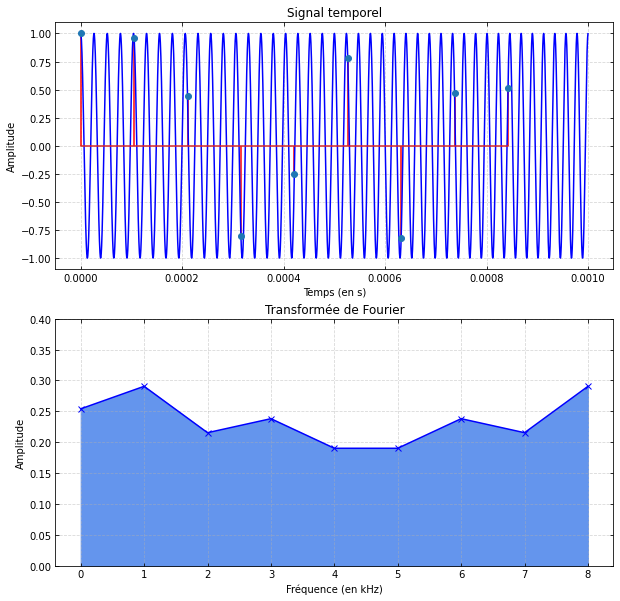

In [188]:
def v(t, w1, w2): #Signal en entrée
    if t<T:
        return np.cos(((w2-w1)*(t/T) + w1)*t)
    return 0


T=10**(-3) #Temps d'impulsion

f0 = 40 * (10**3) #Hz
f1 = f0 - 2*10**3 #Hz
f2 = f0 + 2*10**3 #Hz
t0 = 1.0/(f0*100) #s
N0 = int(T*(f0*100))
t0 = np.arange(0,N0)*t0
x0 = np.zeros(N0)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2
for k in range(N0):
    x0[k] = v(t0[k], w1, w2) #Signal à échantilloner à f0 = 40 kHz

fs = 9.5 * (10**3)
ts = 1.0/(fs)
Ns = int(T*fs)
ts = np.arange(0,Ns)*ts
xs = np.zeros(Ns)
for k in range(Ns):
    xs[k] = v(ts[k], w1, w2) #Points échantillonés à fs = 9,5kHz

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(t0,x0,"b")
plt.stem(ts,xs,"r")
plt.xlabel("Temps (en s)")
plt.ylabel("Amplitude")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Signal temporel')


plt.subplot(212)
tfd = np.fft.fft(xs)
f = np.arange(0,Ns)*1.0/T
plt.plot(f/1e3,np.absolute(tfd)/Ns, 'bx-')
plt.fill_between(f.reshape(1,Ns)[0]/1e3,(np.absolute(tfd)/Ns).reshape(1,Ns)[0], color = 'cornflowerblue')
plt.xlabel('Fréquence (en kHz)')
plt.ylabel('Amplitude')
plt.tick_params(top=True,right=True,direction='in')
plt.ylim(0, 0.4)
plt.grid(linestyle='--',alpha=0.5)
plt.title('Transformée de Fourier')

On échantillonne de nouveau le signal sans respect du critère de Shannon ( $f_s = 9,5 kHz < 2*f_0 = 2*38 kHz$ ).

On remarque par la transformée numérique ci-dessus qu'on retrouve deux "périodes" de pics, dont la première est dans l'intervalle $\left]-f_e/2;f_e/2\right[$. En exportant le raisonement pour la fréquence unique de la Question 3, on peut expliquer la "demi-période" par le repliement de l'ensemble des fréquences que l'on observe (entre $38kHz$ et $42kHz$, car $\frac{f_e}{2} > (42 - 38)kHz$).

On a donc toutes les fréquences entre $-4kHz$ et $4kHz$ qui sont présentes (confirmé par le spectre), puis périodicité du spectre.

La fonction d'autocorrélation du signal émis se définit comme la transformée de Fourier inverse de $|\Pi_B \left(f - f_0)\right)|^2$. Si l'on note $\Delta t$ sa largeur, l'on a la relation : 

$$\Delta t.2 \pi B = 1$$

Donc on a, en ordre de grandeur : 

\begin{equation}
\boxed{\Delta t = \frac{1}{2 \pi B}}
\end{equation} 

Et on en déduit la résolution théorique du système :

$$\boxed{R = \frac{c}{2 \pi B}}$$


#### Code 2 - Une impulsion modulée en fréquence

Le fichier « signal2.mat » correspond à un enregistrement de ces signaux modulés en fréquence sur la même scène que précédemment.
*   Calculer et tracer la fonction d’intercorrélation.
*   Essayer d’identifier le nombre de cibles ainsi que leur distance. Comparer à la résolution théorique calculée au-dessus.


In [189]:
from scipy.signal import find_peaks
B = 4E3 #bande de fréquence

data = scipy.io.loadmat('data/signal2.mat')
e = data['e']
r = data['r']
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2               # axe distance (metres)

resol_theorique = int(c/(2*np.pi*B)  *  2*Fs/c ) + 1
cor_fft = scipy.signal.correlate(r, e, mode = 'same', method = 'fft')    # calcul de la corrélation par FFT
peaks = scipy.signal.find_peaks(np.absolute(cor_fft)[:,0], height = 50, distance = resol_theorique, width=0)   # identification des pics de la fonction d'intercorrélation


peaks_d = peaks[0]*c/Fs/2

In [190]:
#AUTOCORRELATION DU SIGNAL EMIS
cor_fft_2 = scipy.signal.correlate(x0, x0, mode = 'same', method = 'fft')  

No handles with labels found to put in legend.


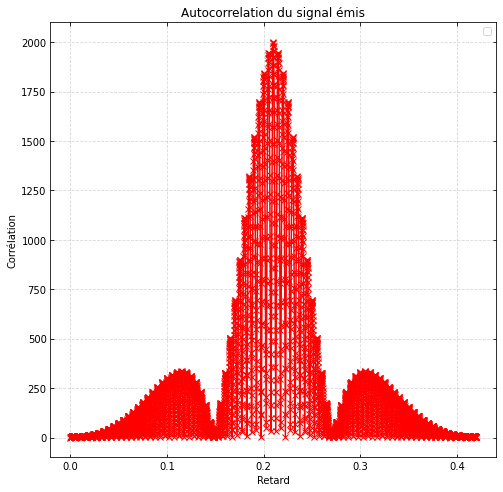

In [191]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(0, len(x0))*1/float(Fs), np.absolute(cor_fft_2), 'rx-',)
plt.xlabel("Retard")
plt.ylabel("Corrélation")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Autocorrelation du signal émis')
plt.legend()
plt.show()

**Réponse Question 5 | Code 2 :** 

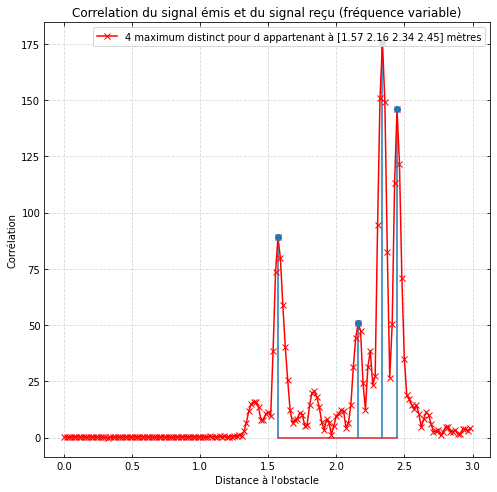

In [192]:
#FONCTION D'INTERCORRELATION :

plt.figure(figsize=(8,8))
plt.plot(np.transpose(d), np.absolute(cor_fft), 'rx-', label = f"{len(peaks_d[0])} maximum distinct pour d appartenant à {np.round(peaks_d, 2)[0]} mètres")
plt.stem((peaks[0]*c/Fs/2)[0], peaks[1]['peak_heights'])  
plt.xlabel("Distance à l'obstacle")
plt.ylabel("Corrélation")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.title('Correlation du signal émis et du signal reçu (fréquence variable)')
plt.legend()
plt.show()

**Commentaire** 

On retrouve donc la présence de $4$ obstacles distincts, c'est donc un nombre plus élevé que précédemment. Le premier se situe à $d = 1.57 m$ de la cible et le deuxième à $d = 2.16 m$ de la cible, à $d=2.34m$ et le dernier à $d = 2.45m$. En effet, la présence d'une cible se traduit par la présence d'un maxima sur la coube d'intercorrélation et il est nécessaire que la distance entre deux maxima soit supérieur à la résolution du système avec $R_{ésolution} = \frac{c}{2 \pi B} \approx 1,4cm < 17cm$ qui était la résolution précédente. 

Finalement, on retrouve donc les pics dans les mêmes endroits que précédemment mais avec une largeur plus faible que lorsque le fréquence du signal émis était constante. Cela a permis de réveler un nouveau pic qui se trouvait être caché par un autre situé trop proche. On remarque donc que cette fréquence variable permet une résolution plus fines car des pics moins large.

## Emission d’un train d’impulsions, cible mobile

### Modélisation des signaux émis et reçus

Nous allons maintenant considérer que les cibles visées peuvent être mobiles. Nous supposerons le vecteur vitesse constant durant le temps de mesure (quelques dixièmes de secondes).

#### Question 6

Montrer que le retard de propagation peut maintenant s’exprimer comme suit $\tau (t) \approx \cfrac{2 d_0}{c} + \cfrac{2 V_r}{c} t $ en fonction de la position initiale $d_0$ de la cible et de sa vitesse radiale $V_r$. Si l’on note $e_a(t) = \beta(t) e^{2 i \pi f_0 t }$, donner l’expression du signal reçu. Montrer que celui-ci peut se
mettre sous la forme suivante : $r_a(t) = \alpha e_a(t - \tau_0) e^{- 2 i \pi f_d t}$ si l’on néglige l’effet de la vitesse sur le terme $\beta(t)$. Donner l’expression de la fréquence Doppler : $f_d$.

---

**Réponse Question 6** 
On prend le radar comme fixe, confondu avec l'origine de notre repère d'étude

Maintenant que la cible est mobile (selon un mouvement 1D, dans la direction du vecteur position initial), sa distance $d$ à l'origine dépend du temps et s'écrit : 
$$d(t) = d_0 + V_rt$$

Et comme le signal parcourt la distance $2d(t)$ à la célérité $c$, on en déduit :  $$\tau (t) = 2\frac{d(t)}{c} = 2\frac{d_0 + V_rt}{c}$$

Dans le cas d'une propagation "idéale", et en utilisant l'approximation sur $\beta$, le signal recu peut alors théoriquement s'écrire : 

$$r_a(t) = \beta (t - \tau (t))e^{2i \pi f_0(t- \tau (t))} \approx \alpha \beta (t - \frac{2d_0}{c})e^{2i \pi f_0(t- \tau (t))}$$ 
avec $\alpha$ une constante.

Or on a, en posant $\tau_0 = \frac{2d_0}{c}$ : 

$$ \beta (t - \frac{2d_0}{c}) = e_a(t - \tau_0)e^{-2i \pi f_0(t - \tau_0)}$$

On obtient donc finalement : 
$$r_a(t) = \alpha e_a(t)e^{-2i \pi f_0 \frac{2V_R}{c}t}$$

D'où la forme désirée avec :
\begin{equation}
\boxed{f_d = \frac{2V_Rf_0}{c}}
\end{equation}

### Estimation de la distance et de la vitesse

Le signal émis est maintenant un train de 8 impulsions successives espacées de 𝑇𝑟, comme représenté sur la figure suivante.
<img src="images/rad_fig4.png" width="500">

Pour faciliter l’estimation jointe de la distance et de la vitesse d’une cible, on convertit les vecteurs correspondants aux signaux émis et reçus en matrices où chaque ligne correspond à une récurrence. Ces matrices comporteront donc 8 lignes dans notre cas de figure.
<img src="images/rad_fig5.png" width="500">


#### Question 7

Que se passerait-il si le retard de propagation est supérieur à $T_r$ ? Définir la portée maximale mesurable sans ambiguïté.

---

**Réponse Question 7 :**

Si le retard se trouve être supérieur à $T_r$, il devient difficile de différencier la réflexion issue la première impulsion de l'impulsion suivante, et on en peut finalement plus savoir de quel train d'onde revient un signal réfléchit. La mesure de la distance séparant l'émetteur de la cible devient alors impossible. 

La portée $d_{max}$, définit comme la distance maximale mesurable sans ambiguïté vaut alors logiquement : 

$$\boxed{d_{max} = \frac{cT_r}{2}}$$

Le traitement pour estimer la distance se fait, comme précédemment par corrélation, mais sur chaque ligne maintenant.

<img src="images/rad_fig6.png" width="500">


La corrélation étant une opération linéaire, le terme de rotation de phase due à la vitesse de la cible n’est pas modifié. Cette fréquence (rotation de la phase de récurrence à récurrence) qui n’est autre que l’effet Doppler pourra donc être estimé par une transformée de Fourier sur l’axe des récurrences. Celle-ci fera alors apparaitre un pic à la fréquence Doppler correspondante.

#### Question 8 

Par application du théorème de Shannon, déterminer la fréquence maximale observable sans ambigüité. En déduire la vitesse maximale mesurable. Montrer que le produit entre la distance maximale et la vitesse maximale mesurables sans ambigüité ne dépend pas des paramètres de la forme d’onde.

---

La fréquence Doppler s'estime par une transformée de Fourier sur l'axe des récurrences, défini par la fréquence $f_R$. Cette dernière prend donc ici le role d'une fréquence d'échantillonage. 

Par application directe du théorème de Shannon, on doit peut alors définir une fréquence maximale observable sans ambigüité:
$$\boxed{f_d^{max} = \frac{f_R}{2} = \frac{1}{2T_R}} $$
D'où une vitesse maximale mesurable: 
$$V_{max} = \frac{cf_d^{max}}{2f_0} = \frac{c}{4T_Rf_0}$$
Et finalement, on a:
$$\boxed{d_{max}V_{max} = \frac{cT_R}{2} . \frac{c}{4T_Rf_0} = \frac {c^2} {8f_0}}$$
On voit donc explicitement que le produit ne dépend pas de $T_R$ et des paramètres de la forme d'onde en général.






#### Code 3 - Train d'impulsions modulées en fréquence

Le fichier « signal3.mat » correspond à un enregistrement de signaux sur une cible mobile. Représenter la cartographie distance/vitesse définie précédemment. En déduire la position et la vitesse de la cible.


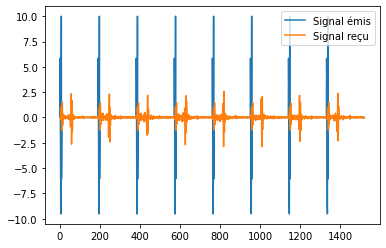

In [193]:
data = scipy.io.loadmat('data/signal3.mat')

e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

plt.figure()
plt.plot(np.arange(0, Nbrec*Tr * Fs), np.real(e), label = 'Signal émis')
plt.plot(np.arange(0, Nbrec*Tr * Fs), np.real(r), label = 'Signal reçu')
plt.legend()
plt.show()

N = Tr * Fs                              # Nombre de points par récurrence
e = np.reshape(e,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = np.reshape(r,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

d = c * np.arange(0,N)/Fs/2                   # axe distance (metres)
fd = np.arange(0,Nbrec)/float(Nbrec)/Tr              # axe fréquence Doppler (Hz)
v = fd*c/2/f0*100                               # conversion des fréquences Doppler en vitesses (cm/s)

cor = scipy.signal.correlate(r, e, mode = 'same', method = 'fft')             # calcul de la corrélation par FFT
cor_dop = np.fft.fft(np.transpose(cor))         # calcul de la FFT Doppler

i, j = np.unravel_index(np.argmax(np.abs(cor_dop)), cor_dop.shape)
d_cible = d[0,j]
v_cible = v[0,i]         #calcul du maximum de corrélation (estimation de la distance et de la vitesse)


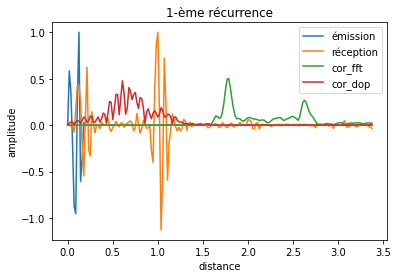

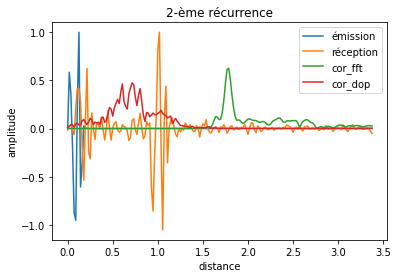

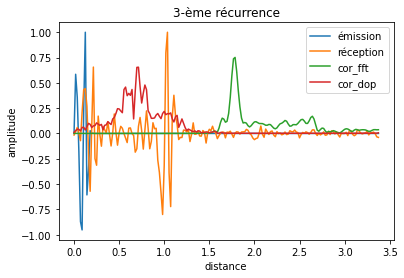

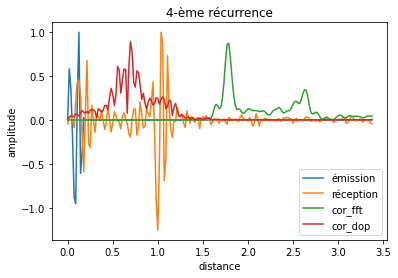

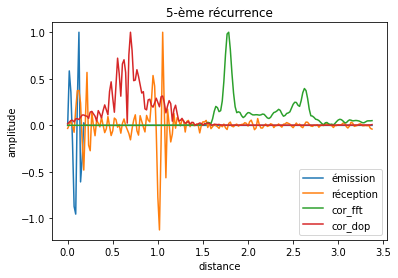

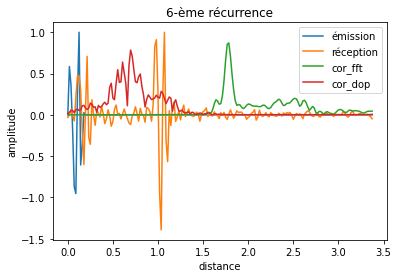

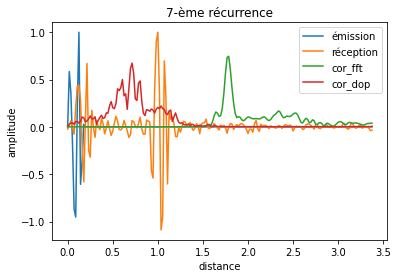

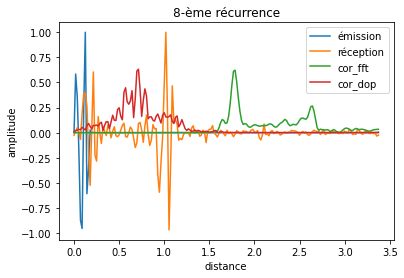

La cible mouvante se situe à 0.69615m et se déplace à la vitesse 10.651629072681704.


In [194]:
#tracés
e = e.T
r = r.T
cor = cor.T
for i in range(8):
    plt.figure()
    plt.plot(d[0],np.real(e[i,:])/np.max(np.real(e[i,:])), label = "émission")
    plt.plot(d[0],np.real(r[i,:])/np.max(np.real(r[i,:])), label = "réception")
    plt.plot(d[0],np.abs(cor[i,:])/np.max(np.abs(cor)), label = "cor_fft")
    plt.plot(d[0],np.abs(cor_dop[i,:])/np.max(np.abs(cor_dop)), label = "cor_dop")
    plt.legend()
    plt.xlabel("distance")
    plt.ylabel("amplitude")
    plt.title(f"{i+1}-ème récurrence")
    plt.show()
print( f'La cible mouvante se situe à {d_cible}m et se déplace à la vitesse {v_cible}.')

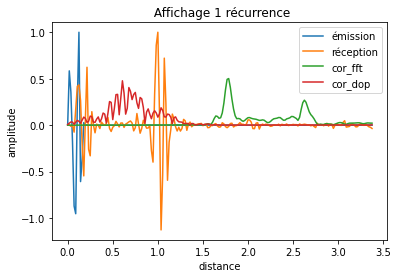

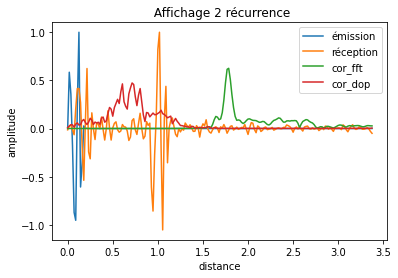

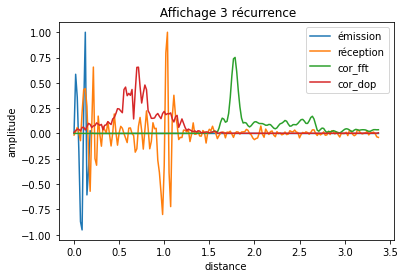

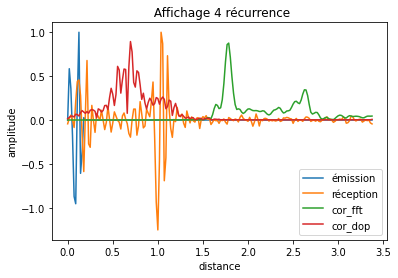

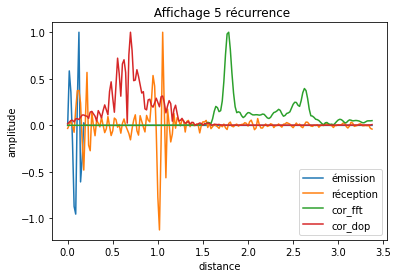

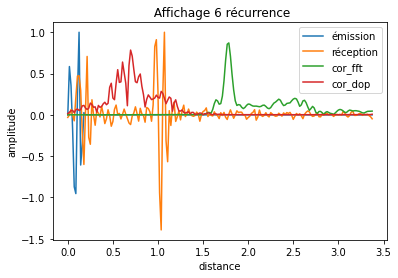

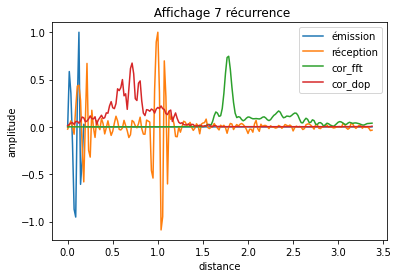

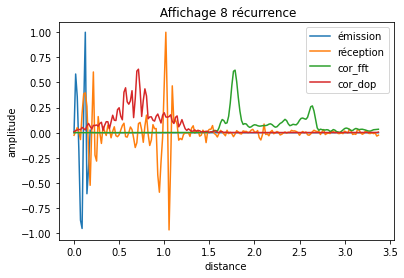

In [195]:
#tracés
for i in range(8):
    plt.plot(d[0],np.real(e[i,:])/np.max(np.real(e[i,:])), label = "émission")
    plt.plot(d[0],np.real(r[i,:])/np.max(np.real(r[i,:])), label = "réception")
    plt.plot(d[0],np.abs(cor[i,:])/np.max(np.abs(cor)), label = "cor_fft")
    plt.plot(d[0],np.abs(cor_dop[i,:])/np.max(np.abs(cor_dop)), label = "cor_dop")
    plt.legend()
    plt.xlabel("distance")
    plt.ylabel("amplitude")
    plt.title(f" Affichage {i+1} récurrence")
    plt.show()

Dans notre application, la vitesse de l’objet cible ne nous intéresse pas directement. Par contre, la scène vue par le radar peut comporter d’autres échos possédant une vitesse nulle (on appelle ces échos indésirables le clutter). On peut alors exploiter l’information de Doppler pour éliminer les cibles possédant un Doppler nul. On appelle ce type de filtre, un filtre MTI (Moving Target Indicator).

> ##### Filtrage
>Un filtre $R$ est un système linéaire invariant temporellement. Il est ainsi caractérisé par sa réponse impulsionnelle, $h[n] = R[\delta[n]]$. La sortie temporelle $y[n]$ sera alors le produit de convolution de cette réponse impulsionnelle et de l’entrée $x[n]$:
>
> $$ y[n] = \sum_{k = -\infty}^{+\infty} x[k] h[n-k] = x * h = h * x = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] $$
>
> Par transformée en Z, on sait que ce produit de convolution se transforme en produit simple :
>
> $$ Y(Z) = H(Z) X(Z) $$ 
>
> On peut alors également caractériser le filtre par sa fonction de transfert : $H(Z) = TZ[h[n]]$\\
qui peut être calculée simplement par $H(Z) = \cfrac{Y(z)}{X(Z)}$
> Dans le cas particulier où $x[n] = e^{2 i \pi \tilde{f}n}$ la sortie temporelle s’écrit :
>
>$$ y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] = e^{2 i \pi \tilde{f}n} \sum_{k = -\infty}^{+\infty} h[k] e^{-2 i \pi \tilde{f}k} = x[n] H(e^{2 i \pi \tilde f})$$
>Autrement dit, une exponentielle complexe est simplement multipliée par un nombre complexe à la traversée d’un système linéaire (c’est une fonction propre). Ce nombre complexe, n’est autre que la fonction de transfert où l’on a limité $Z$ au cercle unité. $Z(= e^{2 i \pi \tilde f})$.Ainsi, la représentation de $H(e^{2 i \pi \tilde f})$ en fonction des fréquences permet d’analyser le gain (module) et le déphasage (argument) subis par les composantes fréquentielles non amorties. C’est le diagramme de Bode.


Le filtre MTI le plus simple est $H_2(Z) = \cfrac{1 - z^{-1}}{2}$. On utilise classiquement ce type de filtre en
cascade dans les systèmes réels : $H_M(Z) = \left(\cfrac{1 - z^{-1}}{2}\right)^{M-1}$.

#### Question 9

 Tracer le comportement fréquentiel du module et de la phase de $H_2(Z)$. Généraliser à $H_M(Z)$. Calculer la fréquence de coupure de ce filtre. En déduire la vitesse « de coupure » correspondante.

---


In [196]:
list_freq = np.logspace(-3, 3, 1000, endpoint=True)
z_s = np.exp(2*np.pi*1j*list_freq)
list_m = np.arange(2,20,3)

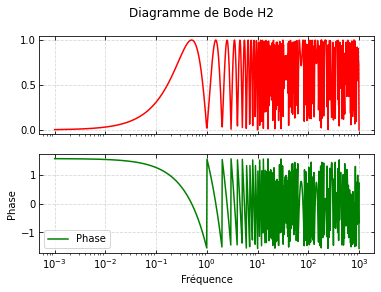

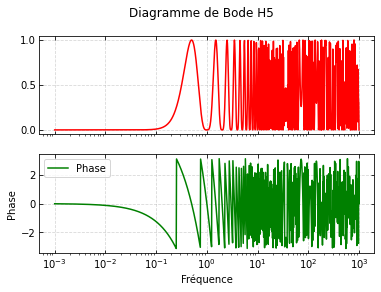

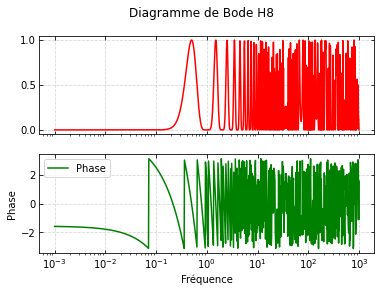

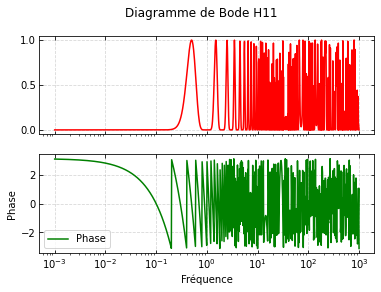

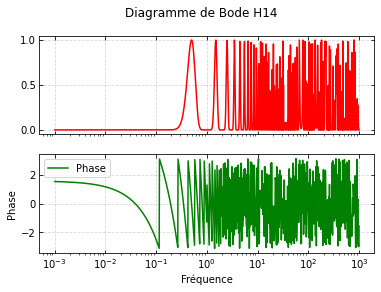

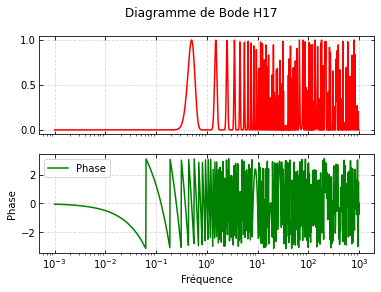

In [198]:
def H_ind(m, z):
        return ((1-1/z)/2)**(m-1)
def H(m):
    return np.vectorize(lambda z: H_ind(m,z))
    
for m in list_m:
    g = H(m)
    H_s = g(z_s)
    fig, (ax1,ax2) =  plt.subplots(2, sharex = True)
    ax2.plot(list_freq,np.angle(g(z_s)), label = "Phase", color = 'green')
    ax1.plot(list_freq, np.abs(g(z_s)), label = "Gain", color = 'red')
    ax1.tick_params(top=True,right=True,direction='in')
    ax1.grid(linestyle='--',alpha=0.5)
    ax2.tick_params(top=True,right=True,direction='in')
    ax2.grid(linestyle='--',alpha=0.5)
    plt.xscale("log")
    plt.legend()
    plt.xlabel("Fréquence")
    plt.ylabel('Phase')
    fig.suptitle(f'Diagramme de Bode H{m}')
    plt.show()

C:\Users\cyril\AppData\Local\Temp/ipykernel_15096/3225539302.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_2/(2*np.pi),20*np.log10(np.absolute(h_2)))


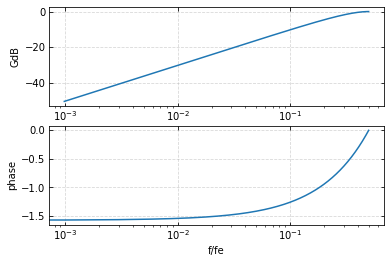

In [ ]:
# w_2 , h_2 =scipy.signal.freqz([-1 , 1], [0, 2])

# plt.figure()
# plt.subplot(211)
# plt.plot(w_2/(2*np.pi),20*np.log10(np.absolute(h_2)))
# plt.xlabel("f/fe")
# plt.xscale('log')
# plt.ylabel("GdB")
# plt.tick_params(top=True,right=True,direction='in')
# plt.grid(linestyle='--',alpha=0.5)
# plt.subplot(212)      
# plt.plot(w_2/(2*np.pi),np.unwrap(np.angle(h_2)))
# plt.xlabel("f/fe")
# plt.xscale('log')
# plt.ylabel("phase")
# plt.tick_params(top=True,right=True,direction='in')
# plt.grid(linestyle='--',alpha=0.5)

#### Question 10

Etudier et tracer le comportement fréquentiel de $G_M(Z) = \cfrac{\sum_{k=0}^{M-1}z^{-k}}{M}$. Montrer que le
changement de variable $Z \to -Z$ permet de passer à filtre passe-haut ($G_M(Z) = G_M(-Z)$). En déduire la fréquence de coupure de ce dernier filtre.

---


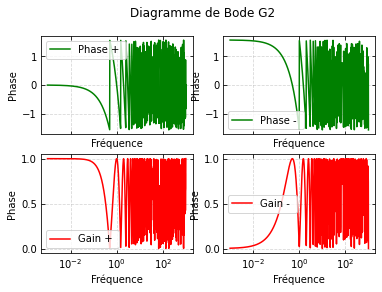

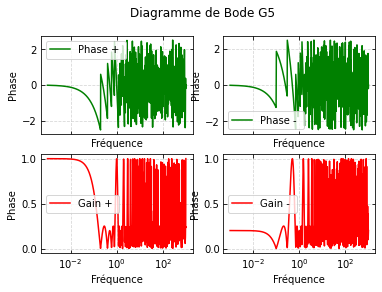

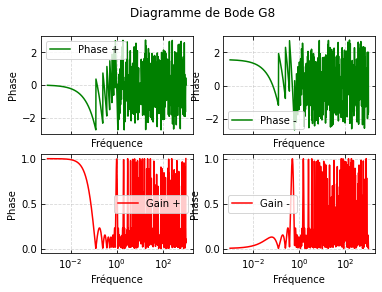

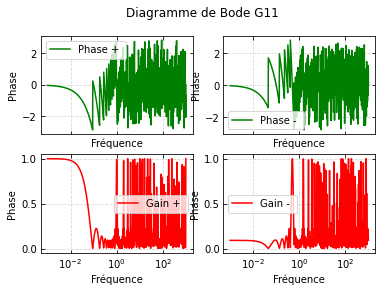

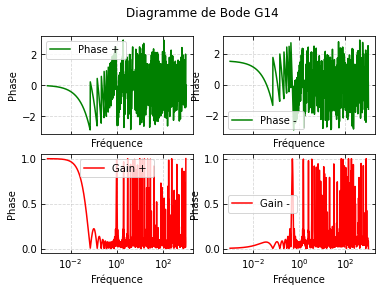

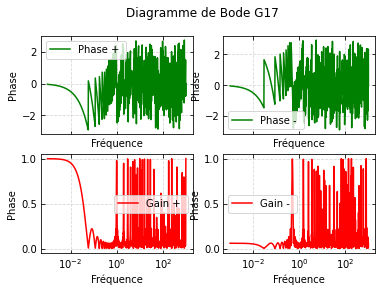

In [200]:
def G(m):
    def G_ind(m, z):
        return sum((z**-k for k in range(m)))/m
    return np.vectorize(lambda z: G_ind(m,z))

for m in list_m:
    g = G(m)
    G_s = g(z_s)
    fig, ax =  plt.subplots(2, 2, sharex = True)
    
    ax[0,0].plot(list_freq,np.angle(g(z_s)), label = "Phase + ", color = 'green')
    ax[0,0].legend()
    ax[0,0].set_xlabel("Fréquence")
    ax[0,0].set_ylabel('Phase')
    ax[0,0].set_xscale("log")
    ax[1,0].plot(list_freq,np.abs(g(z_s)), label = "Gain + ", color = 'red')
    ax[1,0].legend()
    ax[1,0].set_xlabel("Fréquence")
    ax[1,0].set_ylabel('Phase')
    ax[1,0].set_xscale("log")
    ax[0,1].plot(list_freq,np.angle(g(-z_s)), label = "Phase - ", color = 'green')
    ax[0,1].legend()
    ax[0,1].set_xlabel("Fréquence")
    ax[0,1].set_ylabel('Phase')
    ax[0,1].set_xscale("log")
    ax[1,1].plot(list_freq,np.abs(g(-z_s)), label = "Gain - ", color = 'red')
    ax[1,1].legend()
    ax[1,1].set_xlabel("Fréquence")
    ax[1,1].set_ylabel('Phase')
    ax[1,1].set_xscale("log")
    
    ax[0,0].tick_params(top=True,right=True,direction='in')
    ax[0,0].grid(linestyle='--',alpha=0.5)
    ax[1,0].tick_params(top=True,right=True,direction='in')
    ax[1,0].grid(linestyle='--',alpha=0.5)
    ax[0,1].tick_params(top=True,right=True,direction='in')
    ax[0,1].grid(linestyle='--',alpha=0.5)
    ax[1,1].tick_params(top=True,right=True,direction='in')
    ax[1,1].grid(linestyle='--',alpha=0.5)

    fig.suptitle(f'Diagramme de Bode G{m}')
    plt.show()

Pour finir, on s’intéresse à une autre classe de filtres MTI : $T_M(Z) = 1 - \cfrac{\sum_{k = 0}^{M-1}z^{-k}}{M}= 1 - G_M(Z)$. 

In [201]:
def T(m):
    def G_ind(m, z):
        return 1 - sum((z**-k for k in range(m)))/m
    return np.vectorize(lambda z: G_ind(m,z))

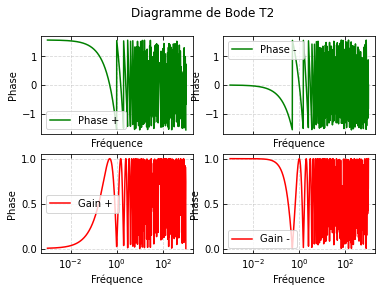

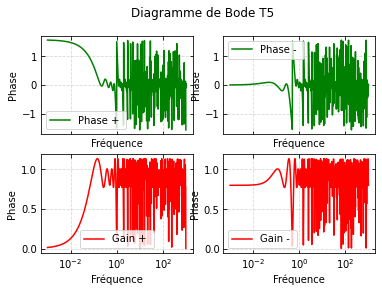

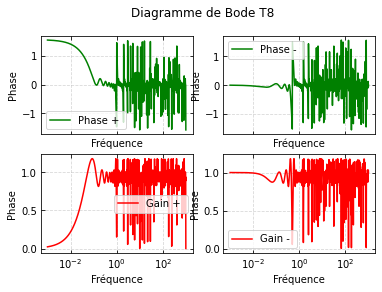

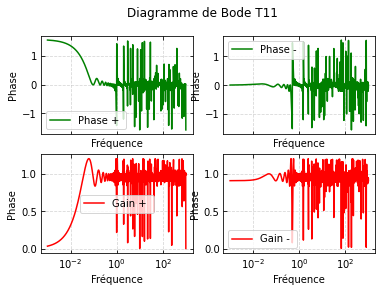

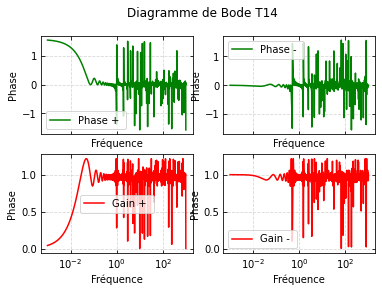

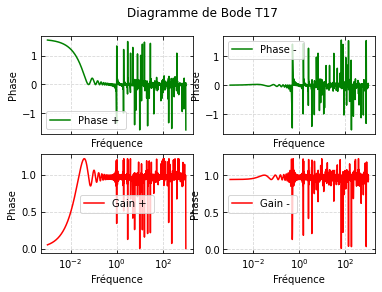

In [202]:
for m in list_m:
    t = T(m)
    T_s = t(z_s)
    fig, ax =  plt.subplots(2, 2, sharex = True)
    
    ax[0,0].plot(list_freq,np.angle(t(z_s)), label = "Phase + ", color = 'green')
    ax[0,0].legend()
    ax[0,0].set_xlabel("Fréquence")
    ax[0,0].set_ylabel('Phase')
    ax[0,0].set_xscale("log")
    ax[1,0].plot(list_freq,np.abs(t(z_s)), label = "Gain + ", color = 'red')
    ax[1,0].legend()
    ax[1,0].set_xlabel("Fréquence")
    ax[1,0].set_ylabel('Phase')
    ax[1,0].set_xscale("log")
    ax[0,1].plot(list_freq,np.angle(t(-z_s)), label = "Phase - ", color = 'green')
    ax[0,1].legend()
    ax[0,1].set_xlabel("Fréquence")
    ax[0,1].set_ylabel('Phase')
    ax[0,1].set_xscale("log")
    ax[1,1].plot(list_freq,np.abs(t(-z_s)), label = "Gain - ", color = 'red')
    ax[1,1].legend()
    ax[1,1].set_xlabel("Fréquence")
    ax[1,1].set_ylabel('Phase')
    ax[1,1].set_xscale("log")
    
    ax[0,0].tick_params(top=True,right=True,direction='in')
    ax[0,0].grid(linestyle='--',alpha=0.5)
    ax[1,0].tick_params(top=True,right=True,direction='in')
    ax[1,0].grid(linestyle='--',alpha=0.5)
    ax[0,1].tick_params(top=True,right=True,direction='in')
    ax[0,1].grid(linestyle='--',alpha=0.5)
    ax[1,1].tick_params(top=True,right=True,direction='in')
    ax[1,1].grid(linestyle='--',alpha=0.5)

    fig.suptitle(f'Diagramme de Bode T{m}')
    plt.show()

####Code 4 - Tracé des gains des filtres MTI
Comparer les filtres MTI précédents à partir des tracés de leurs réponses fréquentielles.


In [ ]:
Npts=100 # Nombre de points des tracés
M=8      #Taille des réponses impulsionnelles

h2 = None # Réponse impulsionnelle du filtre H2
h8 = None # Réponse impulsionnelle du filtre H8
g2 = None # Réponse impulsionnelle du filtre G2
g8 = None # Réponse impulsionnelle du filtre G8
t2 = None # Réponse impulsionnelle du filtre T2
t8 = None # Réponse impulsionnelle du filtre T8

from scipy import signal 
w,h2 = signal.freqz(h2,1,Npts) # Calcul de la fonction de transfert associée
w,h8 = None
w,g8 = None
w,t8 = None

vrad = c/(4*np.pi*f0*Tr)*w*100 # Conversion pulsation réduite en vitesse radiale

plt.figure(),plt.plot(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(None)

TypeError: cannot unpack non-iterable NoneType object

####Code 5 - Test des filtres MTI sur signaux réels
Comparer les 4 filtres précédents (M=2 et M=8) en les appliquant aux signaux du fichier « signal4.mat ». Lequel est le mieux adapté à la détection de la cible ?


In [ ]:
data = scipy.io.loadmat('data/signal4.mat') # chargement du fichier de donnÈes
e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs             # Nombre de points par récurrence
e = e.reshape(N, Nbrec) # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = r.reshape(N,Nbrec)  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

cor = None              # calcul de la corrélation par FFT
cor_dop = None          # calcul de la FFT Doppler

cor_h2 = None
cor_h8 = None
cor_g8 = None
cor_t8 = None

plt.figure(),
plt.subplot(2, 1, 1), plt.imshow()
plt.xlabel(None)
ylabel(None)
title('carto distance/vitesse')

plt.subplot(2,1,2),plt.plot(None)
plt.legend('sans filtre MTI','H2','H8','G8','T8')

TypeError: only integer scalar arrays can be converted to a scalar index